In [1]:
import pandas as pd
import numpy as np
import os


import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import joblib


In [2]:
# The Telco Customer Churn dataset is already available in the './datasets/' folder.
# To download it directly from Kaggle, uncomment the following lines:
# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('blastchar/telco-customer-churn', path='./datasets/', unzip=True)


In [3]:
df = pd.read_csv('./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Findings**

* The dataset has **3 numeric fields**: `tenure`, `MonthlyCharges`, and `TotalCharges`.
* All other columns are **categorical**.
* **TotalCharges** should be numeric but it appears as a string in the dataset.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Most of the columns are **binary (2 values)** or **trinary (3 values)**, and a few are **numeric**, such as `tenure`, `MonthlyCharges`, and `TotalCharges`.

In [8]:
df.duplicated().sum()

np.int64(0)

#### No Duplicate values

In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
# Checking for blank count
blank_counts = df.isin([' ', '']).sum()
blank_counts

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### **Missing Values**

* The dataset has **no null values**.
* There are **11 blank entries** in **one column**, but all other rows and columns contain data.


In [11]:
# Removing any leading or trailing spaces and lowering in the column names
df.columns = df.columns.str.strip().str.lower()

In [12]:
# Removing 'customerid' as it is not useful for analysis
df.drop('customerid', axis=1, inplace=True)

#### Handling the issue of totalcharges showing as object because of blank values

In [13]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
# Converting the data column

In [14]:
df['totalcharges'].isna().sum()

np.int64(11)

In [15]:
# Replacing the null fields with the mean
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mean())

# Analysis of the dataset
- Univariate Analysis

In [16]:
# Converting 'seniorcitizen' from binary (0/1) to categorical ('Yes'/'No') for analysis
df['seniorcitizen'] = df['seniorcitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
# Selecting the categorical values
df_cat = df.select_dtypes(exclude='number')
df_cat.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

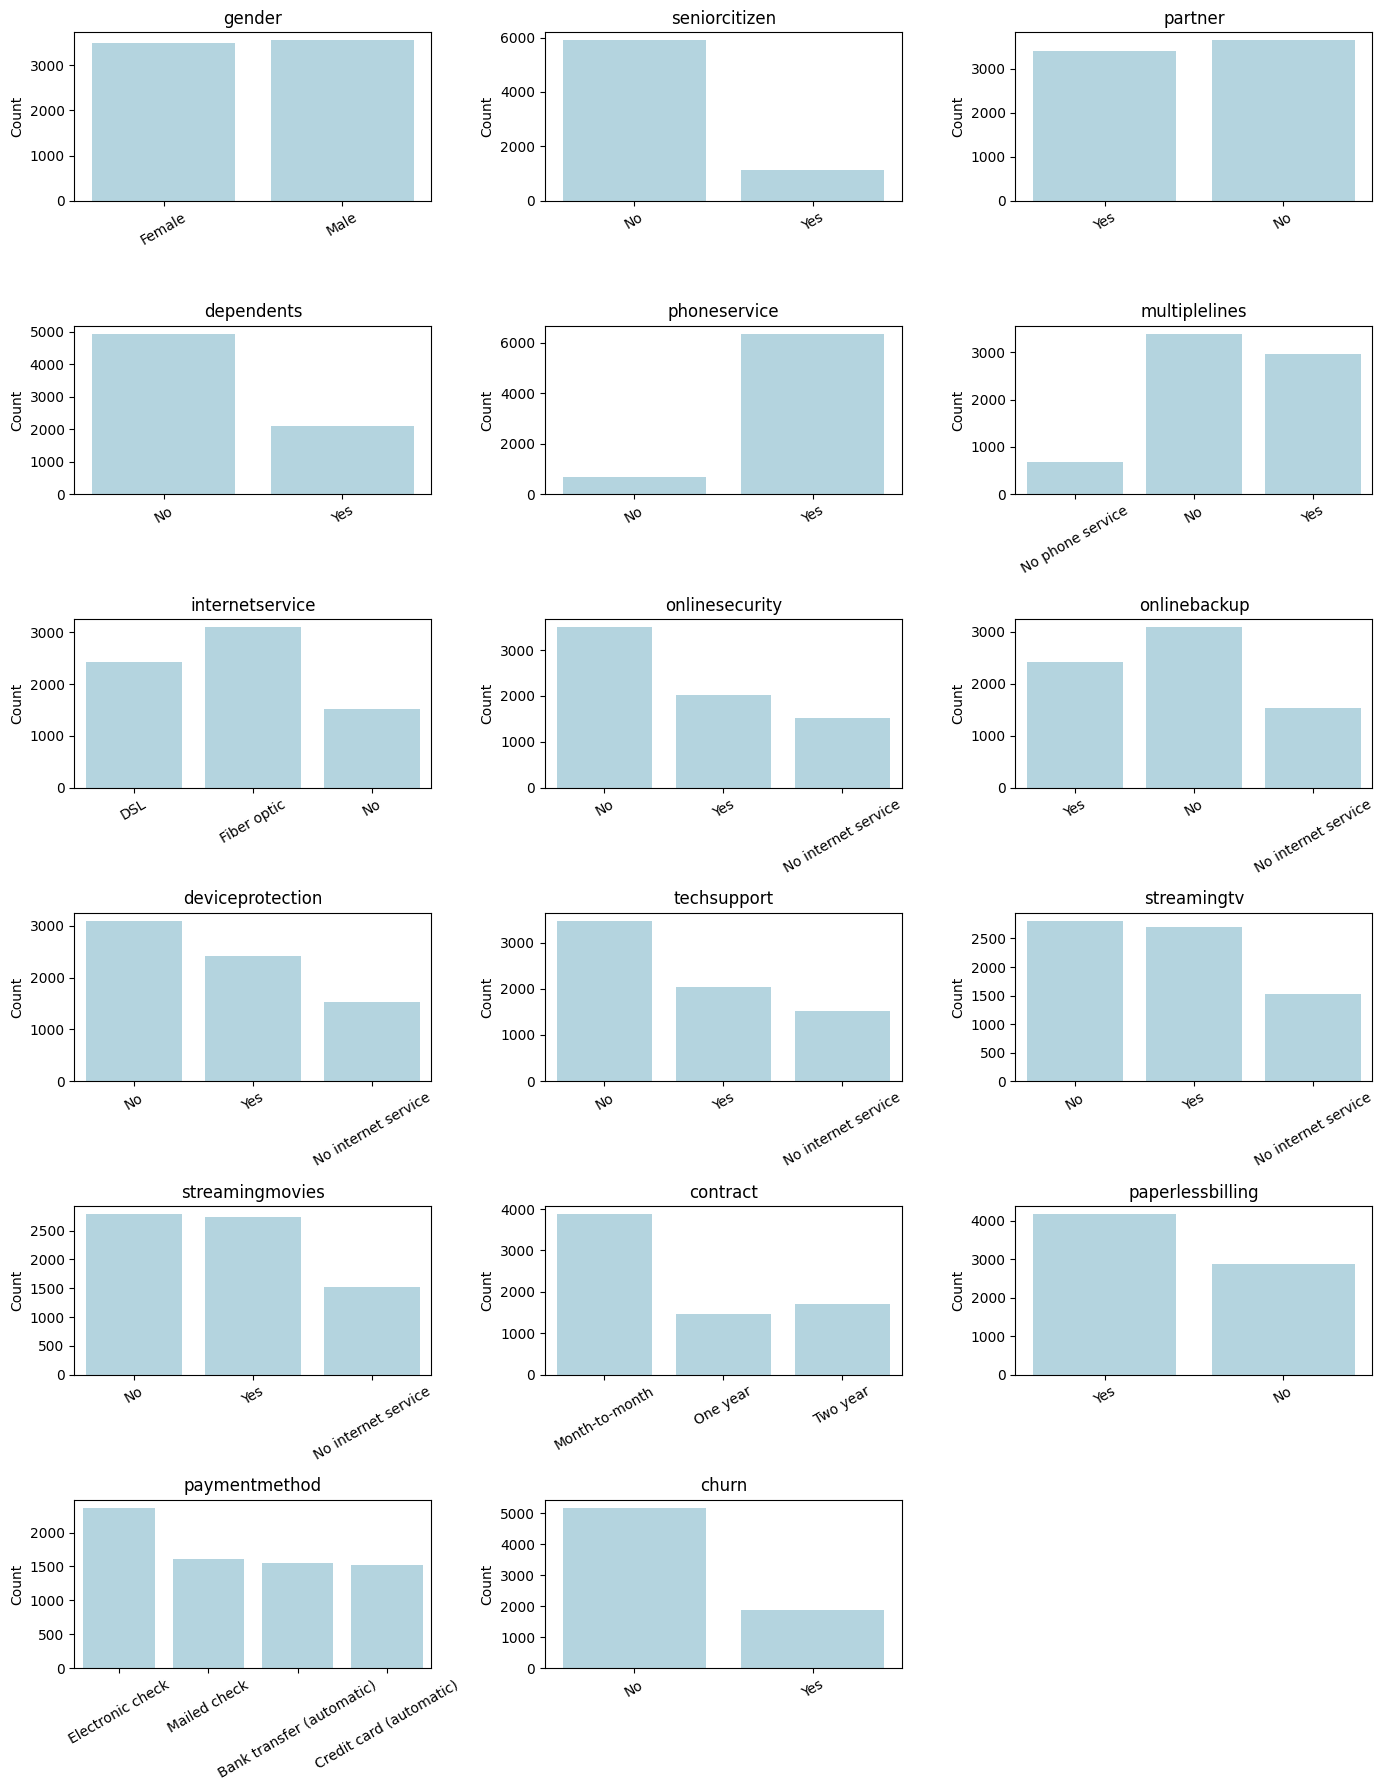

In [17]:
total = len(df_cat.columns)
cols = 3
rows = int(np.ceil(total / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 3*rows))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    sns.countplot(data=df_cat, x=col, ax=axes[i],color='lightblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Customer Data Insights from Visualization

- **Gender Distribution:** The customer base is almost evenly split between male and female.

- **Partner Status:** Slightly more customers do not have partners compared to those who do.

- **Dependents:** A majority of customers do not have dependents.

- **Phone Service:** Most customers subscribe to phone service; only a small portion do not.

- **Multiple Lines:** Among customers with phone service, many have multiple lines, while some have only a single line or no phone service at all.

- **Internet Service Type:** Fiber optic is the most popular internet service, followed by DSL. A noticeable number of customers do not have internet service.

- **Additional Services (Online Security, Backup, Device Protection, Tech Support, Streaming TV/Movies):**  
  Many customers do not subscribe to these add-on services. Those without internet service naturally do not have these options.

- **Contract Type:** Month-to-month contracts dominate the customer base, while longer-term contracts (one year or two years) are less common.

- **Paperless Billing:** More customers prefer paperless billing over traditional billing methods.

- **Payment Methods:** Electronic check is the most common payment method, with mailed checks, bank transfers, and credit card payments also fairly represented.

- **Customer Churn:** The majority of customers remain active, but a significant minority have churned (Class Imbalance).


In [18]:
# Selecting the numberic values
df_no = df.select_dtypes(include = 'number')
df_no.columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

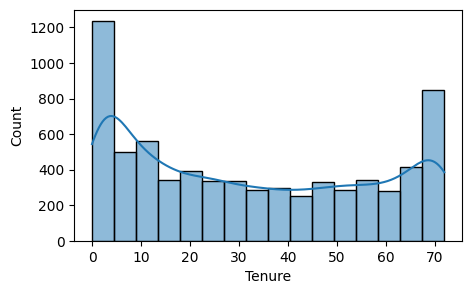

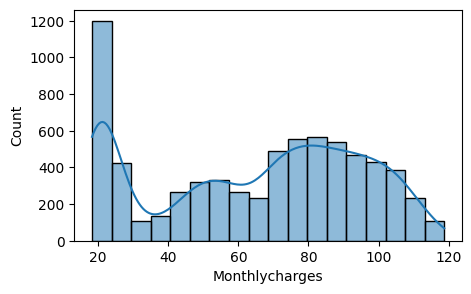

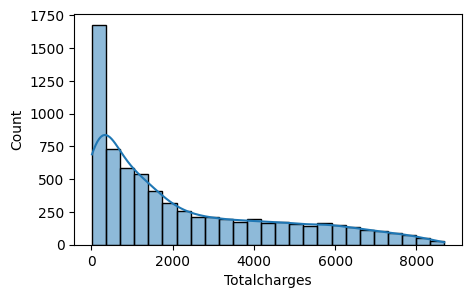

In [19]:
# Checking for the distribution for the numberic fields
for col in df_no:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col],kde=True)
    plt.xlabel(col.title())
    plt.show()

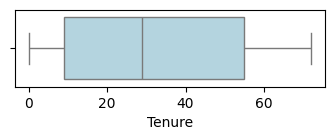

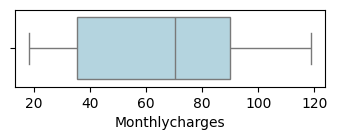

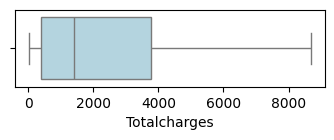

In [20]:
# Checking for outlier using boxplot
for col in df_no:
    plt.figure(figsize=(4, 1))
    sns.boxplot(x=df[col], color='lightblue')
    plt.xlabel(col.title())
    plt.show()

### Tenure
- Most customers have low tenure (new customers).
- There is a peak at the maximum tenure (~72 months), showing many loyal long-term customers.
- Fewer customers have medium tenure.
- No outliers detected.

### Monthly Charges
- Monthly charges show two peaks: one at low charges (~20-30), another around 70-90.
- Indicates different customer groups with varying service usage.
- No outliers detected.

### Total Charges
- Distribution is heavily skewed to the right.
- Many customers have low total charges (new customers).
- A few customers have very high total charges (long-term customers).
- No outliers detected.


### Skewness handling 

In [21]:
df_no.skew()

tenure            0.239540
monthlycharges   -0.220524
totalcharges      0.962394
dtype: float64

### `totalcharges` is strongly skewed `0.962394`

In [22]:
# # Applying log transformation to reduce skewness
# df['totalcharges'] = np.log1p(df['totalcharges'])
df['totalcharges'] = np.sqrt(df['totalcharges'])

# # from sklearn.preprocessing import PowerTransformer
# # pt = PowerTransformer(method='yeo-johnson')
# # df['totalcharges'] = pt.fit_transform(df[['totalcharges']])


print(df['totalcharges'].skew())
# sns.histplot(df['totalcharges'],kde=True)
# plt.show()


0.30784903124051693


In [23]:

scaler = StandardScaler()
df[df_no.columns] = scaler.fit_transform(df_no)

df.head()


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,No
1,Male,No,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,No
2,Male,No,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,Yes
3,Male,No,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,No
4,Female,No,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Yes


In [24]:
df.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [25]:
# Applying label encoding and saving all the encoders
os.makedirs('bin',exist_ok=True)
encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

with open('./bin/label_encoders.pkl', 'wb') as f:
    joblib.dump(encoders, f)


### Handling Target Class Imbalance with SMOTE
#### Splitting the Data and Balancing Classes

In [26]:
x = df.drop('churn',axis=1)
y= df.churn

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,stratify=y, random_state=7)

print('Before Smote ',y_train.value_counts())
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
print('After Smote ',y_train.value_counts())


Before Smote  churn
0    4139
1    1495
Name: count, dtype: int64
After Smote  churn
1    4139
0    4139
Name: count, dtype: int64


# Model Building and Testing

- `Testing models`

In [28]:
# Logistic 
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(x_train,y_train)

print(classification_report(y_train,lr.predict(x_train)))
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      4139
           1       0.75      0.83      0.79      4139

    accuracy                           0.78      8278
   macro avg       0.78      0.78      0.78      8278
weighted avg       0.78      0.78      0.78      8278

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [29]:
# Tree based DecisionTree 

from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(classification_report(y_train,dt.predict(x_train)))
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1035
           1       0.45      0.55      0.50       374

    accuracy                           0.70      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.70      0.71      1409



In [30]:
# RandomForest 

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

print(classification_report(y_train,rf.predict(x_train)))
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [31]:
# GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)

print(classification_report(y_train,gb.predict(x_train)))
print(classification_report(y_test,gb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4139
           1       0.79      0.87      0.83      4139

    accuracy                           0.82      8278
   macro avg       0.83      0.82      0.82      8278
weighted avg       0.83      0.82      0.82      8278

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



In [32]:
# XGBoost
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)

print(classification_report(y_train,xgb.predict(x_train)))
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      4139
           1       0.91      0.96      0.94      4139

    accuracy                           0.93      8278
   macro avg       0.93      0.93      0.93      8278
weighted avg       0.93      0.93      0.93      8278

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1035
           1       0.57      0.69      0.62       374

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



In [33]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

print(classification_report(y_train,knn.predict(x_train)))
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      4139
           1       0.81      0.94      0.87      4139

    accuracy                           0.86      8278
   macro avg       0.87      0.86      0.86      8278
weighted avg       0.87      0.86      0.86      8278

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1035
           1       0.48      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.76      0.72      0.73      1409



In [34]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train,y_train)

print(classification_report(y_train,sv.predict(x_train)))
print(classification_report(y_test,sv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4139
           1       0.79      0.85      0.82      4139

    accuracy                           0.81      8278
   macro avg       0.81      0.81      0.81      8278
weighted avg       0.81      0.81      0.81      8278

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



| Model                   | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Remarks                                           |
| ----------------------- | -------- | ------------------- | ---------------- | ------------------ | ------------------------------------------------- |
| **Logistic Regression** | 0.71     | 0.46                | 0.56             | 0.51               | Struggles with minority class; underfitting       |
| **Decision Tree**       | 0.78     | 0.58                | 0.63             | 0.60               | Better recall; some overfitting                   |
| **Random Forest**       | 0.78     | 0.58                | 0.63             | 0.60               | Robust; slightly better generalization            |
| **Gradient Boosting**   | 0.77     | 0.55                | 0.76             | 0.64               | Balanced precision/recall; decent generalization  |
| **XGBoost**             | 0.78     | 0.57                | 0.69             | 0.62               | Performs similarly to GradientBoost; solid choice |
| **KNN**                 | 0.72     | 0.48                | 0.70             | 0.57               | High recall, but lower precision                  |
| **SVM**                 | 0.77     | 0.55                | 0.76             | 0.64               | Matches GradientBoost and XGBoost performance     |


## Observations

### Training vs. Test Accuracy
- Most models (**Decision Tree**, **Random Forest**, **XGBoost**) show near-perfect training accuracy, indicating slight overfitting.  
- Test performance drops to around 70–78%, confirming overfitting on the training data.

---

### Minority Class (Class 1) Challenge
- Precision is consistently lower for Class 1 across most models.  
- Models like **Gradient Boosting**, **XGBoost**, and **SVM** maintain better recall, meaning they identify more positives — though this comes with slightly more false positives.

---

### Best Balanced Models
The following models offer the best trade-off between precision, recall, and overall accuracy:
- **GradientBoostingClassifier**  
- **XGBClassifier**  
- **SVC (SVM)**  

These models show strong generalization while still capturing minority class patterns effectively.

---

### Weakest Model
- **Logistic Regression** tends to underfit, struggling to capture complex decision boundaries and missing many minority class instances.


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4139
           1       0.93      0.97      0.95      4139

    accuracy                           0.95      8278
   macro avg       0.95      0.95      0.95      8278
weighted avg       0.95      0.95      0.95      8278

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

Gradient Boosting Average F1 (5-fold CV): 0.825726830860073


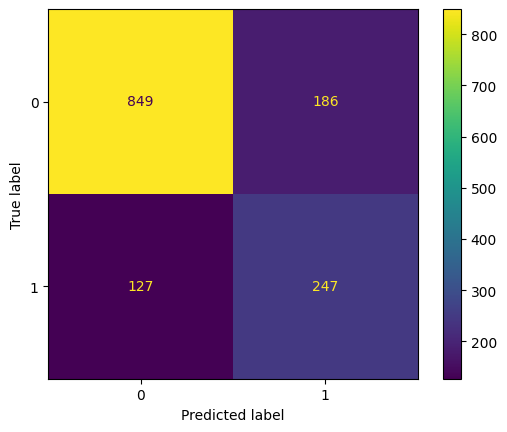

In [35]:
gb = GradientBoostingClassifier(random_state=7)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}


# GridSearchCV

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',   # prioritizing F1 score for imbalanced classes
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_gb = grid_search.best_estimator_


# Evaluation of model

print("Training Classification Report:")
print(classification_report(y_train, best_gb.predict(x_train)))

print("Test Classification Report:")
print(classification_report(y_test, best_gb.predict(x_test)))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_gb, x_test, y_test)


# Cross-validation (F1 score)
cv_scores = cross_val_score(best_gb, x_train, y_train, cv=5, scoring='f1')
print("Gradient Boosting Average F1 (5-fold CV):", cv_scores.mean())


## Gradient Boosting Observations

### 1. Best Hyperparameters
- `learning_rate`: 0.05  
- `max_depth`: 7  
- `min_samples_split`: 2  
- `n_estimators`: 200  
- `subsample`: 0.7  

### 2. Training vs Test Performance
- **Training F1-score**: 0.93–0.94 (very high, indicates slight overfitting)  
- **Test F1-score**: 0.74–0.79 (drop from training, confirms minor overfitting)  
- Accuracy on test set: 0.78

### 3. Minority Class (Class 1) Performance
- **Precision**: 0.58  
- **Recall**: 0.68  
- SMOTE has helped improve minority class detection, though some false positives remain.  
- The model reasonably identifies minority class patterns.

### 4. Cross-Validation
- **5-fold CV average F1-score**: 0.826  
- Confirms model generalizes fairly well.

### 5. Overall Observations
- Gradient Boosting shows **best balance** between precision, recall, and overall accuracy.  
- Slight overfitting is visible despite SMOTE; tuning regularization parameters (`learning_rate`, `subsample`, `max_depth`) could help further reduce it.  


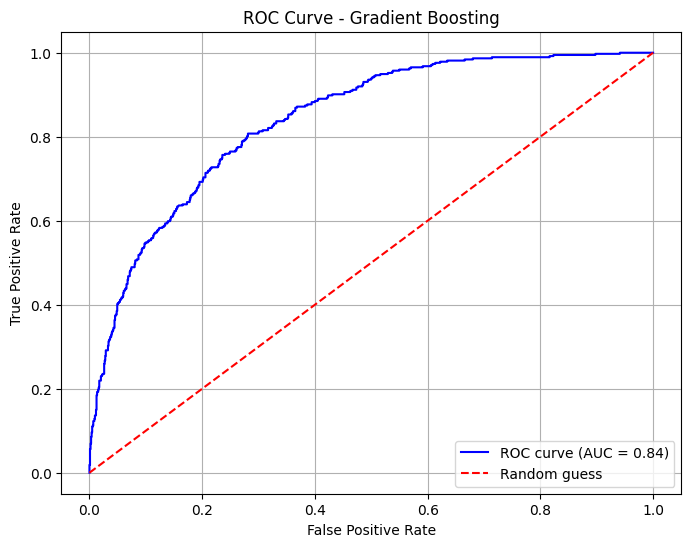

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class using best estimator
y_pred_prob = best_gb.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## ROC Curve Analysis for Gradient Boosting

- **AUC (Area Under Curve): 0.84**
- The model demonstrates strong ability to distinguish between the positive and negative classes.
- An AUC of 0.84 indicates that approximately 84% of the time, the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative one.
- The ROC curve rises steeply early, showing a good balance between true positive rate and false positive rate.
- Compared to a random guess baseline (AUC = 0.5), this performance is significantly better.

### Interpretation:
- The model has **good predictive performance** on the test set.
- There is potential for further improvement to push AUC closer to 0.9 or above.
- Current results suggest the model is suitable for practical use, especially with the given class imbalance and complexity.

In [37]:
# Exporting model
joblib.dump(best_gb, './bin/gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")

Model saved as 'gradient_boosting_model.pkl'
